# Introductory applied machine learning
# Assignment 4: Unsupervised Learning Part A (KMeans Clustering) [50%]

## Important Instructions

**It is important that you follow the instructions below to the letter - we will not be responsible for incorrect marking due to non-standard practices.**

1. <font color='red'>We have split Assignment 4 into two parts to make it easier for you to work on them separately and for the markers to give you feedback. This is part A of Assignment 4 and deals with the News-Group Dataset - Part B deals with the MNIST dataset. Both Assignments together are still worth 50% of CourseWork 2. **Remember to submit both notebooks (you can submit them separately).**</font>

1. You *MUST* have your environment set up as in the [README](https://github.com/michael-camilleri/IAML2018) and you *must activate this environment before running this notebook*:
```
source activate py3iaml
cd [DIRECTORY CONTAINING GIT REPOSITORY]
jupyter notebook
# Navigate to this file
```

1. Read the instructions carefully, especially where asked to name variables with a specific name. Wherever you are required to produce code you should use code cells, otherwise you should use markdown cells to report results and explain answers. In most cases we indicate the nature of answer we are expecting (code/text), and also provide the code/markdown cell where to put it

1. There are some questions which are **specific to those taking the Level-11 version** of the course (INFR11182 and INFR11152). These are clearly marked with the words **(LEVEL 11)** and must be completed by those taking the Level 11 course. Those on the Level 10 version (INFR10069) may (and are advised to) attempt such questions but this will not affect their mark in any way, nor will they get feedback on them.

1. The .csv files that you will be using are located at `./datasets` (i.e. use the `datasets` directory **adjacent** to this file).

1. Keep your answers brief and concise. Most written questions can be answered with 2-3 lines of explanation: **in questions where this is specified, you will be penalised if you go over.**

1. Make sure to distinguish between **attributes** (columns of the data) and **features** (which typically refers only to the independent variables, i.e. excluding the target variables).

1. Make sure to show **all** your code/working. 

1. Write readable code. While we do not expect you to follow [PEP8](https://www.python.org/dev/peps/pep-0008/) to the letter, the code should be adequately understandable, with plots/visualisations correctly labelled. **Do** use inline comments when doing something non-standard. When asked to present numerical values, make sure to represent real numbers in the appropriate precision to exemplify your answer. Marks *WILL* be deducted if the marker cannot understand your logic/results.

1. **Collaboration:** You may discuss the assignment with your colleagues, provided that the writing that you submit is entirely your own. That is, you must NOT borrow actual text or code from others. We ask that you provide a list of the people who you've had discussions with (if any). Please refer to the [Academic Misconduct](http://web.inf.ed.ac.uk/infweb/admin/policies/academic-misconduct) page for what consistutes a breach of the above.

### SUBMISSION Mechanics

**IMPORTANT:** You must submit this assignment by **Thursday 22/11/2018 at 16:00**. 

**Late submissions:** The policy stated in the School of Informatics is that normally you will not be allowed to submit coursework late. See the [ITO webpage](http://web.inf.ed.ac.uk/infweb/student-services/ito/admin/coursework-projects/late-coursework-extension-requests) for exceptions to this, e.g. in case of serious medical illness or serious personal problems.

**Resubmission:** If you submit your file(s) again, the previous submission is **overwritten**. We will mark the version that is in the submission folder at the deadline.

**N.B.**: This Assignment requires submitting **two files (electronically as described below)**:
 1. This Jupyter Notebook for Part A, *and*
 1. The Jupyter Notebook for Part B
 
All submissions happen electronically. To submit:
1. Fill out this notebook (as well as Part B), making sure to:
   1. save it with **all code/text and visualisations**: markers are NOT expected to run any cells,
   1. keep the name of the file **UNCHANGED**, *and*
   1. **keep the same structure**: retain the questions, **DO NOT** delete any cells and **avoid** adding unnecessary cells unless absolutely necessary, as this makes the job harder for the markers.
   
1. Submit it using the `submit` functionality. To do this, you must be on a DICE environment. Open a Terminal, and:
   1. **On-Campus Students**: navigate to the location of this notebook and execute the following command:
   
      ```submit iaml cw2 04_A_KMeans.ipynb 04_B_PCA.ipynb```
      
   1. **Distance Learners:** These instructions also apply to those students who work on their own computer. First you need to copy your work onto DICE (so that you can use the `submit` command). For this, you can use `scp` or `rsync` (you may need to install these yourself). You can copy files to `student.ssh.inf.ed.ac.uk`, then ssh into it in order to submit. The following is an example. Replace entries in `[square brackets]` with your specific details: i.e. if your student number is for example s1234567, then `[YOUR USERNAME]` becomes `s1234567`.
   
    ```
    scp -r [FULL PATH TO 04_A_KMeans.ipynb] [YOUR USERNAME]@student.ssh.inf.ed.ac.uk:04_A_KMeans.ipynb
    scp -r [FULL PATH TO 04_B_PCA.ipynb] [YOUR USERNAME]@student.ssh.inf.ed.ac.uk:04_B_PCA.ipynb
    ssh [YOUR USERNAME]@student.ssh.inf.ed.ac.uk
    ssh student.login
    submit iaml cw2 04_A_KMeans.ipynb 04_B_PCA.ipynb
    ```
    
   What actually happens in the background is that your file is placed in a folder available to markers. If you submit a file with the same name into the same location, **it will *overwrite* your previous submission**. You should receive an automatic email confirmation after submission.
  

### Marking Breakdown

The Level 10 and Level 11 points are marked out of different totals, however these are all normalised to 100%. Both Part A (this notebook) and Part B are each worth 50% of the Total Mark for Assignment 4.

**70-100%** results/answer correct plus extra achievement at understanding or analysis of results. Clear explanations, evidence of creative or deeper thought will contribute to a higher grade.

**60-69%** results/answer correct or nearly correct and well explained.

**50-59%** results/answer in right direction but significant errors.

**40-49%** some evidence that the student has gained some understanding, but not answered the questions
properly.

**0-39%** serious error or slack work.

Note that while this is not a programming assignment, in questions which involve visualisation of results and/or long cold snippets, some marks may be deducted if the code is not adequately readable.

## Imports

Use the cell below to include any imports you deem necessary.

In [281]:
%matplotlib inline
%pylab inline

# Nice Formatting within Jupyter Notebook
%matplotlib inline
from IPython.display import display # Allows multiple displays from a single code-cell

# For Getting the Data
from sklearn.datasets import fetch_20newsgroups, load_digits
from sklearn.feature_extraction.text import TfidfVectorizer

# System functionality
import sys
sys.path.append('..')

# Import Here any Additional modules you use. To import utilities we provide, use something like:
#   from utils.plotter import plot_hinton

# Your Code goes here:
import os
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
from sklearn.decomposition import PCA
from utils.plotter import plot_voronoi

Populating the interactive namespace from numpy and matplotlib


/Users/narrik/miniconda3/envs/py3iaml/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['colors']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


## Description of the dataset

In this part of the assignment we will cluster the observations in the 20 Newsgroups dataset using the k-means algorithm. Each row of the dataset represents a document with bag of words features. If we were not given the labels for each document (i.e. the newsgroup it came from), clustering could allow us to infer which documents should have the same label. Observing common words within each cluster may allow us to give meaning to these inferred labels too.

### Description of the Data

This dataset is a collection of approximately 20,000 newsgroup documents, partitioned (nearly) evenly across 20 different newsgroups, each corresponding to a different topic. Some of the newsgroups are very closely related to each other (e.g. comp.sys.ibm.pc.hardware, comp.sys.mac.hardware), while others are highly unrelated (e.g misc.forsale, soc.religion.christian). 

To save you time and to make the problem manageable with limited computational resources, we preprocessed the original dataset. We will use documents from only 5 out of the 20 newsgroups, which results in a 5-class problem. More specifically the 5 classes correspond to the following newsgroups: 
1. `alt.atheism`
2. `comp.sys.ibm.pc.hardware`
3. `comp.sys.mac.hardware`
4. `rec.sport.baseball`
5. `rec.sport.hockey `

However, note here that classes 2-3 and 4-5 are rather closely related.

**In contrast to Assignment 1**, we have opted to use tf-idf weights ([term frequency - inverse document frequency](https://en.wikipedia.org/wiki/Tf%E2%80%93idf)) for each word instead of the frequency counts (which is why we will be downloading it anew). These weights represent the importance of a word to a document with respect to a collection of documents. The importance increases proportionally to the number of times a word appears in the document and decreases proportionally to the number of times the word appears in the whole corpus. 

Additionally we preprocess the data to include the most frequent 1000 words that appear in more than two documents, less than half of all documents, and that are not [stop words](https://en.wikipedia.org/wiki/Stop_words). We have provided the code for this preprocessing for you.

## 1. Exploration of the dataset

Instead of providing the data as a dataset, we are going to import the data from the sklearn library. Make sure you have an active internet connection and run the cell below to import the data. It would be a good idea to understand the code but it's not strictly necessary (see the [sklearn documentation](http://scikit-learn.org/0.19/datasets/index.html#the-20-newsgroups-text-dataset)).

**Do not change any of the code in this cell.**

*This may take a wee while as it needs to download the dataset and preprocess it.*

In [282]:
# Load the Data with only the required categories
cats = ['alt.atheism', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 
        'rec.sport.baseball', 'rec.sport.hockey']
newsgroups_train = fetch_20newsgroups(subset='train', categories=cats, 
                                      remove=('headers', 'footers', 'quotes'), data_home='./datasets')
# Transform Data to TF-IDF and store in X/y
vectorizer = TfidfVectorizer(max_df=0.5, max_features=1000, min_df=2, stop_words='english', 
                             token_pattern='(?u)\\b[A-z]{2,}\\b')
X = pd.DataFrame(vectorizer.fit_transform(newsgroups_train.data).todense(), 
                 columns=vectorizer.get_feature_names())
y = pd.Series(np.array(cats)[newsgroups_train.target])

### ========== Question 1.1 --- [10 marks] ==========

As usual we start with an initial inspection of the data. 

&nbsp;&nbsp;**(a)** [Code] Using suitable pandas/numpy methods, summarise the key properties of the data (variables `X` and `y`). This should be no more than a few lines of code.<br>
&nbsp;&nbsp;**(b)** [Text] Comment on your observations from ***(a)*** (dimensionality, data ranges, anything out of the ordinary). Be sure to indicate what `X` and `y` are (data type and purpose). (<5 sentences)<br>
&nbsp;&nbsp;**(c)** [Text] Why do you think it is useful to consider TF-IDF weights as opposed to just the frequency of times a word appears in a document as a feature? (1 or 2 sentences)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2845 entries, 0 to 2844
Columns: 1000 entries, abc to zone
dtypes: float64(1000)
memory usage: 21.7 MB


None

abc      ability         able           ac       accept  \
count  2845.000000  2845.000000  2845.000000  2845.000000  2845.000000   
mean      0.002436     0.002149     0.006709     0.001454     0.002286   
std       0.030224     0.020739     0.034631     0.023100     0.021634   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     0.000000     0.000000     0.000000   
75%       0.000000     0.000000     0.000000     0.000000     0.000000   
max       0.723914     0.420916     0.431380     0.519765     0.443354   

            access    according     acquired     actually      adaptec  \
count  2845.000000  2845.000000  2845.000000  2845.000000  2845.000000   
mean      0.003953     0.003115     0.000921     0.008366     0.001816   
std       0.030111     0.026958     0.016275     0.043921     0.026026   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     0.000000     0.000000     0.000000   
75%       0.000000     0.000000     0.000000     0.000000     0.000000   
max       0.663808     0.572124     0.413233     1.000000     0.578282   

           adapter          add      address      advance    advantage  \
count  2845.000000  2845.000000  2845.000000  2845.000000  2845.000000   
mean      0.001948     0.004346     0.005444     0.006751     0.002074   
std       0.021924     0.032763     0.043735     0.038801     0.022357   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     0.000000     0.000000     0.000000   
75%       0.000000     0.000000     0.000000     0.000000     0.000000   
max       0.515908     0.569114     0.829519     0.624724     0.460632   

            advice          ago        agree        ahead          ahl  \
count  2845.000000  2845.000000  2845.000000  2845.000000  2845.000000   
mean      0.002630     0.005717     0.005265     0.001816     0.001252   
std       0.025134     0.034103     0.034597     0.022532     0.021062   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     0.000000     0.000000     0.000000   
75%       0.000000     0.000000     0.000000     0.000000     0.000000   
max       0.399285     0.474195     0.517133     0.515734     0.645302   

                al        allow      allowed       allows       alomar  \
count  2845.000000  2845.000000  2845.000000  2845.000000  2845.000000   
mean      0.004034     0.002633     0.001908     0.001571     0.003423   
std       0.032852     0.022898     0.019553     0.018070     0.042492   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     0.000000     0.000000     0.000000   
75%       0.000000     0.000000     0.000000     0.000000     0.000000   
max       0.547738     0.454043     0.483493     0.335889     0.786199   

               alt     american        amour       andrew      angeles  \
count  2845.000000  2845.000000  2845.000000  2845.000000  2845.000000   
mean      0.002295     0.002890     0.000684     0.002202     0.001367   
std       0.028210     0.024145     0.013320     0.025851     0.014816   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     0.000000     0.000000     0.000000   
75%       0.000000     0.000000     0.000000     0.000000     0.000000   
max       1.000000     0.380662     0.570912     0.529946     0.305968   

            a

,abc,ability,able,ac,accept,access,according,acquired,actually,adaptec,adapter,add,address,advance,advantage,advice,ago,agree,ahead,ahl,al,allow,allowed,allows,alomar,alt,american,amour,andrew,angeles,answer,answers,anybody,apparently,appears,apple,appreciate,appreciated,apr,april,area,aren,arena,argument,arguments,article,ask,asked,assume,assuming,atheism,atheist,atheists,atlanta,available,average,away,backup,bad,ball,baltimore,base,baseball,based,basically,basis,bat,bay,beat,belief,beliefs,believe,best,better,bible,big,biggest,bios,bit,black,blue,blues,board,boards,bob,bobby,book,boot,bos,boston,bought,box,braves,brian,brind,bring,brown,bruins,btw,buf,buffalo,built,bus,business,buy,buying,ca,cable,cache,cal,calgary,called,came,canada,canadian,caps,captain,card,cards,care,career,case,cause,cd,center,centris,certain,certainly,chance,change,changed,channel,cheap,check,cheers,chi,chicago,chip,chips,choice,christian,christianity,christians,city,claim,claims,clark,clear,clearly,clemens,cleveland,clock,close,club,coach,code,college,color,colorado,colors,com,come,comes,coming,comment,comments,common,comp,compare,compared,compatible,complete,completely,computer,computers,conclusion,conference,configuration,connect,connector,consider,considered,considering,contact,context,control,controller,copy,correct,cost,couldn,couple,course,coverage,cpu,created,cs,cubs,cup,current,currently,cut,data,date,dave,david,day,days,dead,deal,death,decent,decided,defense,defenseman,defensive,define,definition,deleted,det,details,detroit,device,devices,devils,did,didn,difference,different,dineen,directly,discussion,disk,disks,display,division,dma,dodgers,does,doesn,doing,don,dos,double,doubt,draft,drive,driver,drivers,drives,duo,earlier,early,easily,east,easy,ed,edm,edmonton,edu,effect,eisa,email,end,entire,era,eric,error,errors,esdi,especially,espn,ethernet,event,evidence,exactly,example,excellent,exist,existence,exists,expansion,expect,expected,experience,explain,external,extra,face,fact,faith,fallacy,false,fan,fans,faq,far,fast,faster,fax,feature,features,feel,field,figure,file,files,final,finally,finals,fine,finland,fit,flames,floppy,florida,flyers,follow,following,forget,form,format,fpu,francis,frank,free,friend,ftp,future,game,games,gateway,gave,general,generally,germany,gets,getting,gilmour,given,gives,giving,gm,goal,goalie,goals,god,gods,goes,going,gone,good,got,graphics,great,greatly,gretzky,group,guess,guy,guys,half,hall,hand,happen,happened,happens,happy,har,hard,hardware,hartford,haven,having,hawks,hd,head,heads,hear,heard,hell,hello,help,hi,high,higher,history,hit,hits,hitter,hitting,hockey,hold,home,hope,hot,houston,hp,human,ibm,ice,id,ide,idea,ideas,ii,iii,iisi,important,include,included,includes,including,individual,info,information,injury,install,installed,instead,interested,interesting,interface,internal,internet,irq,isa,islam,islamic,islanders,isn,issue,jagr,jeff,jersey,jesus,jets,jewish,jim,job,joe,john,jose,joseph,jumper,jumpers,just,keith,key,keyboard,kill,kind,king,kings,know,knowledge,known,knows,la,lack,large,late,later,law,lc,lead,leads,leafs,league,leave,led,left,lemieux,let,level,life,light,like,likely,limited,lindros,line,lines,list,little,live,ll,local,logic,long,longer,look,looked,looking,looks,lopez,los,lose,loss,lost,lot,lots,louis,love,low,lower,luck,mac,machine,machines,macintosh,macs,mail,main,maine,major,majority,make,makes,making,man,manager,manual,maple,mark,master,matter,matthew,maybe,mb,mean,meaning,means,media,meg,memory,men,mention,mentioned,message,mets,mhz,michael,middle,mike,million,milwaukee,min,mind,minnesota,minor,minutes,missed,mode,model,modem,mon,moncton,money,monitor,monitors,months,montreal,moral,morality,morris,motherboard,mouse,murphy,murray,mvp,names,national,natural,nature,near,nec,necessary,need,needed,needs,net,network,new,news,newsgroup,nhl,nice,night,nj,nl,non,north,note,notice,noticed,nubus,number,numbers,ny,nyi,nyr,objective,obvious,obviously,offense,offensive,oh,oilers,ok,okay,old,ones,open,o

,abc,ability,able,ac,accept,access,according,acquired,actually,adaptec,adapter,add,address,advance,advantage,advice,ago,agree,ahead,ahl,al,allow,allowed,allows,alomar,alt,american,amour,andrew,angeles,answer,answers,anybody,apparently,appears,apple,appreciate,appreciated,apr,april,area,aren,arena,argument,arguments,article,ask,asked,assume,assuming,atheism,atheist,atheists,atlanta,available,average,away,backup,bad,ball,baltimore,base,baseball,based,basically,basis,bat,bay,beat,belief,beliefs,believe,best,better,bible,big,biggest,bios,bit,black,blue,blues,board,boards,bob,bobby,book,boot,bos,boston,bought,box,braves,brian,brind,bring,brown,bruins,btw,buf,buffalo,built,bus,business,buy,buying,ca,cable,cache,cal,calgary,called,came,canada,canadian,caps,captain,card,cards,care,career,case,cause,cd,center,centris,certain,certainly,chance,change,changed,channel,cheap,check,cheers,chi,chicago,chip,chips,choice,christian,christianity,christians,city,claim,claims,clark,clear,clearly,clemens,cleveland,clock,close,club,coach,code,college,color,colorado,colors,com,come,comes,coming,comment,comments,common,comp,compare,compared,compatible,complete,completely,computer,computers,conclusion,conference,configuration,connect,connector,consider,considered,considering,contact,context,control,controller,copy,correct,cost,couldn,couple,course,coverage,cpu,created,cs,cubs,cup,current,currently,cut,data,date,dave,david,day,days,dead,deal,death,decent,decided,defense,defenseman,defensive,define,definition,deleted,det,details,detroit,device,devices,devils,did,didn,difference,different,dineen,directly,discussion,disk,disks,display,division,dma,dodgers,does,doesn,doing,don,dos,double,doubt,draft,drive,driver,drivers,drives,duo,earlier,early,easily,east,easy,ed,edm,edmonton,edu,effect,eisa,email,end,entire,era,eric,error,errors,esdi,especially,espn,ethernet,event,evidence,exactly,example,excellent,exist,existence,exists,expansion,expect,expected,experience,explain,external,extra,face,fact,faith,fallacy,false,fan,fans,faq,far,fast,faster,fax,feature,features,feel,field,figure,file,files,final,finally,finals,fine,finland,fit,flames,floppy,florida,flyers,follow,following,forget,form,format,fpu,francis,frank,free,friend,ftp,future,game,games,gateway,gave,general,generally,germany,gets,getting,gilmour,given,gives,giving,gm,goal,goalie,goals,god,gods,goes,going,gone,good,got,graphics,great,greatly,gretzky,group,guess,guy,guys,half,hall,hand,happen,happened,happens,happy,har,hard,hardware,hartford,haven,having,hawks,hd,head,heads,hear,heard,hell,hello,help,hi,high,higher,history,hit,hits,hitter,hitting,hockey,hold,home,hope,hot,houston,hp,human,ibm,ice,id,ide,idea,ideas,ii,iii,iisi,important,include,included,includes,including,individual,info,information,injury,install,installed,instead,interested,interesting,interface,internal,internet,irq,isa,islam,islamic,islanders,isn,issue,jagr,jeff,jersey,jesus,jets,jewish,jim,job,joe,john,jose,joseph,jumper,jumpers,just,keith,key,keyboard,kill,kind,king,kings,know,knowledge,known,knows,la,lack,large,late,later,law,lc,lead,leads,leafs,league,leave,led,left,lemieux,let,level,life,light,like,likely,limited,lindros,line,lines,list,little,live,ll,local,logic,long,longer,look,looked,looking,looks,lopez,los,lose,loss,lost,lot,lots,louis,love,low,lower,luck,mac,machine,machines,macintosh,macs,mail,main,maine,major,majority,make,makes,making,man,manager,manual,maple,mark,master,matter,matthew,maybe,mb,mean,meaning,means,media,meg,memory,men,mention,mentioned,message,mets,mhz,michael,middle,mike,million,milwaukee,min,mind,minnesota,minor,minutes,missed,mode,model,modem,mon,moncton,money,monitor,monitors,months,montreal,moral,morality,morris,motherboard,mouse,murphy,murray,mvp,names,national,natural,nature,near,nec,necessary,need,needed,needs,net,network,new,news,newsgroup,nhl,nice,night,nj,nl,non,north,note,notice,noticed,nubus,number,numbers,ny,nyi,nyr,objective,obvious,obviously,offense,offensive,oh,oilers,ok,okay,old,ones,open,o

Number of instances: 2845, number of attributes: 1000


count                 2845
unique                   5
top       rec.sport.hockey
freq                   600
dtype: object

Number of classes for sanity checking (2845,)


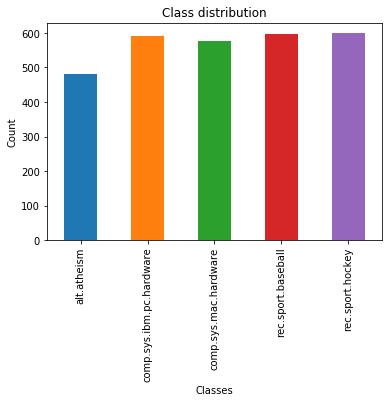

In [283]:
# (a) # Your Code goes here:
# Get a feeling for the data

pd.set_option('display.max_columns', None)
display(X.info())
display(X.describe())
display(X.head(5))
display(X.tail(5))
print('Number of instances: {}, number of attributes: {}'.format(X.shape[0], X.shape[1]))

display(y.describe())
print('Number of classes for sanity checking {}'.format(y.shape))

fig, ax = plt.subplots()
y.astype('category').value_counts(sort=False).plot(kind='bar', ax=ax) # Create Counts
plt.xlabel('Classes')
plt.ylabel('Count')
plt.title('Class distribution')
plt.show()

(b) ***Your answer goes here:***

For the X dataset we have 2845 instances all with 1000 attributes, with each attribute being a float value between 0 and 1 (indicating the values have been normalised). The attributes represent the tf-idf value for each word in a given document. In majority of the instances, we see that only few words we chose as features have a value greater than 0, which with the way tf-idf is calculated, and since we chose only words which appear in less than half (and more than 2), means that they don't appear in the current document (we could also get a value of 0 if they appeared in all of the documents). The y dataset also has 2845 instances, but every instance can only take 1 of 5 possible values (the 5 classes of newsgroups), and all of the values are of type object (where the object represents a class). Classes are roughly evenly distributed.

(c) ***Your answer goes here:***

The tf-idf metric is useful because it only assigns high values to words that appear frequently in the current document AND aren't very frequent amongst all documents. If we used the frequency of times a word appears in a document as a feature, words such as "actually" and "basically" would get very high values, since they appear more frequently on average, compared to context specific words (such as "bible" or "yankees"), however, their presence in a document contributes very little information towards classifying the document.

## 2. Unsupervised Learning

### ========== Question 2.1 --- [6 marks] ==========

We will now use [K-Means](http://scikit-learn.org/0.19/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans) clustering as a means of unsupervised learning of the document classes. Familiarise yourself with the implementation and then answer the following questions.

&nbsp;&nbsp;**(a)** [Text] The KMeans algorithm is non-deterministic. Explain what is meant by this, why this is the case, and how the final model is selected (3 sentences).<br>
&nbsp;&nbsp;**(b)** [Text] One of the parameters we need to specify when using k-means is the number of clusters. What is a reasonable number for this problem and why? *Hint: Look at the `y` values, which are in a Pandas `Series`*.<br>
&nbsp;&nbsp;**(b)** [Code] Create and fit a K-Means model to the training data `X` with your specified number of clusters. For reproducability, set `random_state=1000` -- keep other arguments at default values. Keep track of the k-means object created.

(a) ***Your answer goes here:***

A non-deterministic algorithm can produce different results on multiple runs on the same data. K-Means is non-deterministic because the initial placement of the clusters is random, and since clusters will only converge to a local minimum, rather than global one, this can result in different final cluster positions/assignments for different runs on the same data. The final model is selected by picking the initial placement configuration which yielded the smallest aggregate distance when the clusters converged.

(b) ***Your answer goes here:***

Since we have 5 different classes in our dataset, most obvious and reasonable choice is to pick k=5 and have a cluster for each class. We could also consider k=3 as classes 2-3 and classes 4-5 are closely related and will likely exhibit similar features, which could be captured in 1 cluster (1 cluster for class 1, 1 cluster for classes 2-3, 1 cluster for classes 4-5). I am going to pick k=5 in this case.

In [284]:
#(c) # Your Code goes here:
kmeans = KMeans(n_clusters=5, random_state=1000)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=1000, tol=0.0001, verbose=0)

### ========== Question 2.2 --- [6 marks] ==========

We will now evaluate the quality of this fit, primarily through the Adjusted Rand Index (ARI) of the model.

&nbsp;&nbsp;**(a)** [Text] By referring to the [sklearn documentation](http://scikit-learn.org/0.19/modules/clustering.html), describe what the ARI (`adjusted_rand_score`) measures about the quality of the fit. What is a disadvantage of this measure for evaluating clustering performance? (2-3 sentences) <br>
&nbsp;&nbsp;**(b)** [Code] Compute (and display) the Adjusted Rand Index of the fitted model.<br>
&nbsp;&nbsp;**(c)** [Text] Comment (1 or 2 sentences) on the quality of the fit as expressed by this measure.<br>

(a) ***Your answer goes here:***

ARI measures the similarity of the two assignments (our prediction vs actual) ignoring permutations and with chance normalisation (a random fit should have a value of 0, a fit that is particularly bad (worse than random) should have a value near -1, while a perfect fit has a value of 1). Correction for chance makes sure random fits have values around 0 (this is why it's **adjusted** rand index). The main disadvantage of using ARI is that we need to have the correct truth labels for the data, which we very rarely possess in practice (K-Means is an unsupervised method after all).

In [285]:
#(b) # Your Code goes here:
print('Adjusted Rand Index of our fitted model is {}'.format(adjusted_rand_score(y, kmeans.labels_)))

Adjusted Rand Index of our fitted model is 0.22619332384922217


(c) ***Your answer goes here:***

Quality of our fit is rather poor, with a value not too far from 0, our model is not much better than a random fit.

### ========== Question 2.3 --- [12 marks] ==========
<a id='question_2_3'></a>
Let us explore the quality of the fit further. We will visualise bar-charts of the fit.

&nbsp;&nbsp;**(a)** [Code] Create a bar-chart of the number of data-points with a particular class assigned to each cluster centre. You should be able to do this in one plot using seaborn functionality. Make sure to distinguish the cluster-centres (using for example grid-lines), and label the plot appropriately. As part of the cluster labels, include the total number of data-points assigned to that cluster. *Hint: it might be useful to specify the image width using `pylab.rcParams['figure.figsize'] = (width, height)` to make things clearer.*<br>
&nbsp;&nbsp;**(b)** [Text] Comment (3 to 4 sentences) on the distribution of datapoints to cluster centres, and how this relates to the ARI measure above.


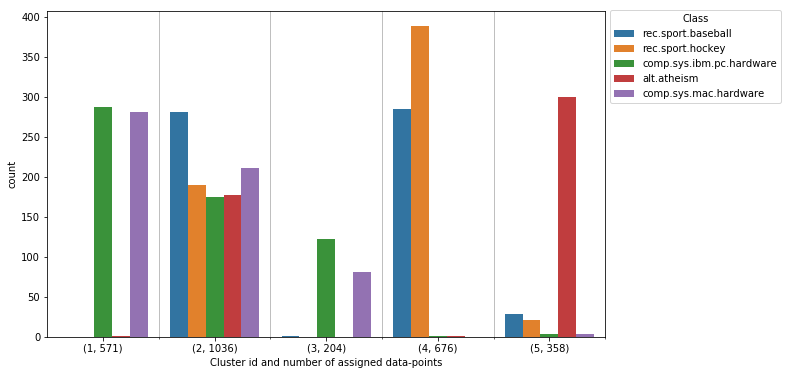

In [286]:
#(a) # Your Code goes here:
fig, ax = plt.subplots(figsize=(10,6))
ax = sns.countplot(x=kmeans.labels_, hue=y, ax=ax)
ax.legend(loc='center left', bbox_to_anchor=[1, 0.86], title='Class')
ax.set_xticklabels (zip([1,2,3,4,5], np.bincount(kmeans.labels_)))
plt.gca().set_xticks([i + 0.5 for i in range(5)], minor=True)
plt.grid(True, which='minor')
plt.xlabel('Cluster id and number of assigned data-points')
plt.show()

(b) ***Your answer goes here:***

In terms of separating the data with different labels, only cluster 5 clearly contains just 1 main type of data point (alt.atheism), clusters 1 and 3 mainly consist of both the 'comp.sys' classes while cluster 4 is mianly a combination of the 'rec.sport' classes, this goes in line with our prediction of those classes being closely related. No class was clearly separated from other classes, as and equal amount data points from all the classes exists in cluster 2. Besider cluster 5, no cluster managed to distinctly capture only 1 class and as a result our clustering is only marginally better than a random one, which goes in line with our "slightly better than random" ARI score.

### ========== Question 2.4 --- (LEVEL 11) --- [11 marks] ==========

Another way to quantify the quality of the fit is to use the Aggregate Intra-Cluster Distance (this is known as the `inertia` within SKLearn).

&nbsp;&nbsp;**(a)** [Text] Again by referring to the [sklearn documentation](http://scikit-learn.org/0.19/modules/clustering.html), describe what this measure reports. Indicate why it may be less straightforward at judging the quality of the clustering than the ARI. (2 to 3 sentences). <br>
&nbsp;&nbsp;**(b)** [Code] Report the Inertia of the fitted model as well as the mean distance between each data-point and the global mean. Compute also a distance matrix such that the entry with index (i,j) shows the distance between centre i and centre j.<br>
&nbsp;&nbsp;**(c)** [Text] Using the above values, comment on what the Inertia score tells us about the quality of the fit, as well as anything else you can say about the clusters. (2 to 3 sentences)

(a) ***Your answer goes here:***

In [287]:
# (b) # Your Code goes here:

(c) ***Your answer goes here:***

### ========== Question 2.5 --- [16 marks] ==========

We will now investigate using [PCA](http://scikit-learn.org/0.19/modules/generated/sklearn.decomposition.PCA.html) dimensionality reduction to try and improve the quality of the fit.

&nbsp;&nbsp;**(a)** [Text] Give one reason why PCA **might** be preferrable in certain cases in reducing dimensionality over just picking a subset of the features.<br>
&nbsp;&nbsp;**(b)** [Code] Pick 10 values in the range [1, ... 1000] inclusive, representing feature-space dimensionality `n`. Use a log-scale to span this range efficiently. For each of these values, reduce the dimensionality of `X` to the respective size (i.e. PCA with `n` components), and then fit a 5-centre KMeans classifier, storing the `adjusted_rand_score` for each dimensionality. *N.B: Set the `random_state=1000` for both PCA and K-Means objects to ensure reproducability.*<br>
&nbsp;&nbsp;**(c)** [Code] Plot the the `adjusted_rand_score` against the number of principal components. **Scale** the axes appropriately to visualise the results, and label the plot.<br>
&nbsp;&nbsp;**(d)** [Text] Comment on the effect dimensionality reduction had on the K-Means clustering and what could give rise to this (2 - 3 sentences).<br>
&nbsp;&nbsp;**(e)** [Code] Fit a 5-cluster K-Means object to the data with the dimensionality that produced the best ARI. In a similar manner to [Question 2.3](#question_2_3), plot a bar-chart of the number of data-points from each class assigned to each cluster. *N.B: Remember to set `random_state=1000` for both PCA and K-Means objects, and label all your diagrams*.<br>
&nbsp;&nbsp;**(f)** [Text] Compare the clustering distribution in **(e)** and in [Question 2.3 **(a)**](#question_2_3). *Hint: comment briefly (1 to 2 sentences) on the distribution of classes*.

(a) ***Your answer goes here:***

PCA creates linear combinations of the input features and picks dimensions where the variability of the data is the greatest, if we are just selecting a subset of features, it's possible that none of the features by themselves could offer as much variability as their linear combinations can.

In [288]:
#(b) # Your Code goes here:
ARI_nd = []
n = [1,2,4,8,16,32,64,128,512,1000]
for dimension in n:
    pca = PCA(n_components=dimension, random_state=1000)
    X_nd = pca.fit_transform(X)
    kmeans.fit(X_nd)
    ARI_nd.append(adjusted_rand_score(y, kmeans.labels_))


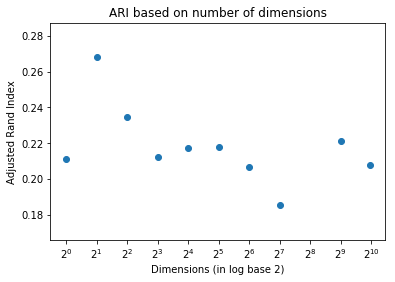

In [289]:
#(c) # Your Code goes here:

plt.scatter(n,ARI_nd)
plt.xlabel('Dimensions (in log base 2)')
plt.ylabel('Adjusted Rand Index')
plt.xscale("log",basex = 2)
plt.xticks([2**i for i in range(0,11)])
plt.title('ARI based on number of dimensions')
plt.show()

(d) ***Your answer goes here:***

As observed in **Q1.1**, our instances have values greater than 0 in only very few of the features, meaning most of the features are useless when it comes to gaining information about the instance. We observed that having 2 dimensions yielded the largest improvement in ARI (from 0.23 to 0.27). The reason behind this might be that most of the features which have values greater than 0 in an instance can be projected into 2 dimensions by linear combinations using PCA.

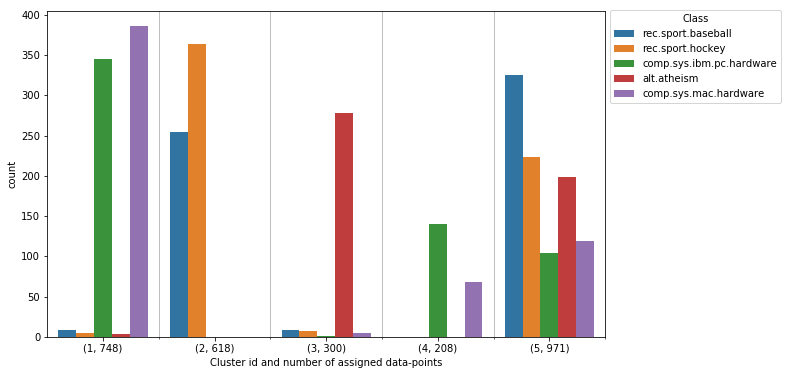

In [290]:
#(e) # Your Code goes here:
best_dim = n[np.argmax(ARI_nd)]
pca = PCA(n_components=best_dim, random_state=1000)
X_bd = pca.fit_transform(X)
kmeans.fit(X_bd)

fig, ax = plt.subplots(figsize=(10,6))
ax = sns.countplot(x=kmeans.labels_, hue=y, ax=ax)
ax.legend(loc='center left', bbox_to_anchor=[1, 0.86], title='Class')
ax.set_xticklabels (zip([1,2,3,4,5], np.bincount(kmeans.labels_)))
plt.gca().set_xticks([i + 0.5 for i in range(5)], minor=True)
plt.grid(True, which='minor')
plt.xlabel('Cluster id and number of assigned data-points')
plt.show()

(f) ***Your answer goes here:***

Overall the distribution of the classes is very similar to the on in **Q2.3**, with one difference being that the 'comp.sys' classes (green and purple) were less present in the cluster which mixed all classes together (cluster 5 in this case, cluster 2 in **Q2.3**), indicating our model might be better able to separate those 2 classes from the rest. Again because classes under 'rec.sport' and 'comp.sys' are closely related, K-Means was unable to separate them from one another, and only if we have an instance in cluster 3 are we able to say what class (alt.atheism) it belongs to with high level of confidence.

### ========== Question 2.6 --- [16 marks] ==========

Another benefit of Dimensionality Reduction is that it allows us to visualise the data. That is, while we cannot visualise a 1000-feature space, we can pick the top two components and visualise those. We will do this by means of a [Voronoi Diagram](https://en.wikipedia.org/wiki/Voronoi_diagram), which we will use to analyse the cluster centres.

&nbsp;&nbsp;**(a)** [Text] By explaining what a Voronoi Diagram is, indicate why it is useful in visualising the extent (in space) of K-Means clusters?<br>
&nbsp;&nbsp;**(b)** [Code] Using the function `plot_voronoi` which we provided in the `utils` package, visualise the clusters in the two-dimensional PCA space (top two components). Mark each cluster centre, and visualise **some** (*Hint: sub-sample*) of the data points to give you an idea of where the true classes lie. Make sure that the key elements of the plot are clearly visible/discernible (you may need to tweak some parameters) and label clearly all necessary elements of the plot (color-coding, data points). *Tip: you may need to change y to a numeric value if using matplotlib rather than seaborn*.<br>
&nbsp;&nbsp;**(c)** [Text] What can you conclude from the plot as to the "classification-performance" of the K-Means classifier?

(a) ***Your answer goes here:***

Voronoi diagram is a partitioning of a plane into regions based on distance to some specific points. If we set the points to be cluster centres of our clusters, then we can use this diagram to visualise the size and position of each of the clusters, as the regions in the diagram will represent the clusters.

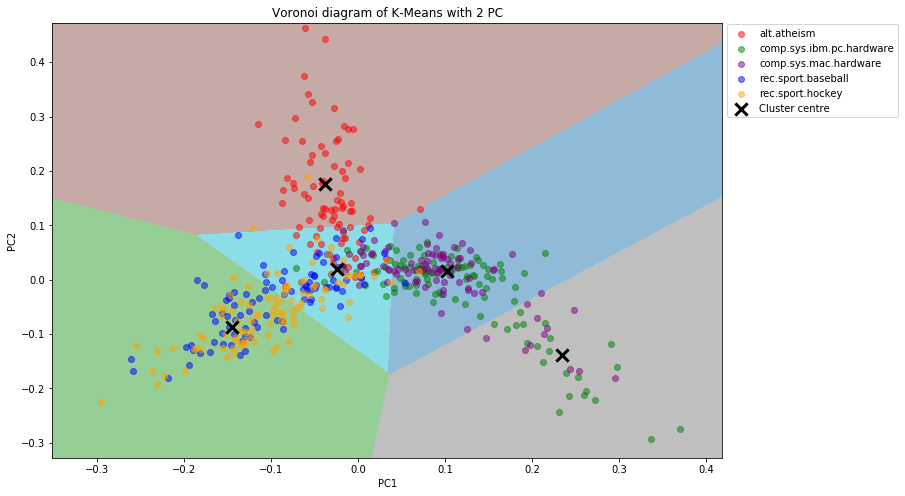

In [291]:
#(b) # Your Code goes here:
# Subsample first 500 instances
subsamples_X = X_bd[:500,:]
subsamples_y = y[:500]
colors = ['red','green','purple','blue','orange']
labels = np.unique(y)
fig, ax = plt.subplots(figsize=(12,8))
ax = plot_voronoi(predictor=kmeans,sampling=2000,_range=[np.min(X_bd[:,0])-0.01,np.max(X_bd[:,0])+0.01,np.min(X_bd[:,1])-0.01,np.max(X_bd[:,1])+0.01],clr_map='tab10')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Voronoi diagram of K-Means with 2 PC')
for col,lbl in zip(colors,labels):
    plt.scatter(subsamples_X[subsamples_y == lbl,0],subsamples_X[subsamples_y == lbl,1], color=col, label=lbl, alpha =0.5)
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1], s=150, marker = 'x',color='black',lw = 3, label='Cluster centre')    
plt.legend(loc='center left', bbox_to_anchor=[1, 0.89])
plt.show()

(c) ***Your answer goes here:***

Apart from the 'alt.atheism' class, our classification ability is rather low as K-Means ended being unable to distinguish between the related classes (both in 'rec.sport' and 'comp.sys'). Overall if we used clusters for classification the performance would be poor and results unsatisfactory. The main problem is that our classes cannot be easily separated given the features we have, as related classes have very similar values in them.